In [ ]:
import pandas as pd
import numpy as np

# خواندن فایل داده (مسیر فایل را با مسیر خودت جایگزین کن)
file_path = r"E:\Erfan\Fundamental intelligent systems\teleCust1000t.csv"
df = pd.read_csv(file_path)

# نمایش چند سطر اول (اختیاری برای اطمینان)
display(df.head())

# ساختار کلی داده
print("🔹 اطلاعات کلی داده‌ها:")
df.info()

# خلاصه آماری داده‌ها
print("\n🔹 خلاصه آماری داده‌ها:")
display(df.describe(include='all'))


region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

🔹 اطلاعات کلی داده‌ها:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB

🔹 خلاصه آماری داده‌ها:


region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.000000     0.000000   
25%      29.000000     2.000000     3.000000     0.000000     0.000000   
50%      47.000000     3.000000     8.000000     0.000000     1.000000   
75%      83.000000     4.000000    17.000000     0.000000     1.000000   
max    1668.000000     5.000000    47.000000     1.000000     1.000000   

            reside      custcat  
count  1000.000000  1000.000000  
mean      2.331000     2.487000  
std       1.435793     1.120306  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       2.000000     3.000000  
75%       3.000000     3.000000  
max       8.000000     4.000000

In [14]:
missing = df.isnull().sum()

print("🔹 بررسی داده‌های گمشده در هر ستون:")
display(missing[missing > 0] if missing.sum() > 0 else "✅ هیچ داده‌ی گمشده‌ای در دیتاست وجود ندارد.")

# اگر داده‌ی گمشده وجود داشت، سه روش مختلف را اعمال کن
if missing.sum() > 0:
    from sklearn.impute import KNNImputer

    # --- روش ۱: پر کردن با میانگین ---
    df_mean = df.copy()
    df_mean = df_mean.fillna(df_mean.mean(numeric_only=True))

    # --- روش ۲: پر کردن با میانه ---
    df_median = df.copy()
    df_median = df_median.fillna(df_median.median(numeric_only=True))

    # --- روش ۳: پر کردن با KNNImputer (حدس بر اساس نزدیک‌ترین همسایه) ---
    num_cols = df.select_dtypes(include=[np.number]).columns
    imputer = KNNImputer(n_neighbors=3)
    df_knn = df.copy()
    df_knn[num_cols] = imputer.fit_transform(df_knn[num_cols])

    # --- مقایسه‌ی آماری میان سه روش ---
    print("\n🔹 مقایسه میانگین ویژگی‌های عددی پس از هر روش:")
    compare = pd.DataFrame({
        "Original_Mean": df[num_cols].mean(),
        "Mean_Imputed": df_mean[num_cols].mean(),
        "Median_Imputed": df_median[num_cols].mean(),
        "KNN_Imputed": df_knn[num_cols].mean()
    })
    display(compare.head())

    print("\n✅ داده‌های گمشده با سه روش مختلف جایگزین شدند و نتایج مقایسه شدند.")


🔹 بررسی داده‌های گمشده در هر ستون:


'✅ هیچ داده\u200cی گمشده\u200cای در دیتاست وجود ندارد.'

In [15]:
# شناسایی ستون‌های عددی و طبقه‌ای
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

print("🔹 ویژگی‌های عددی:")
for col in num_cols:
    print("  -", col)

print("\n🔹 ویژگی‌های طبقه‌ای:")
if len(cat_cols) > 0:
    for col in cat_cols:
        print("  -", col)
else:
    print("  ✅ هیچ ویژگی طبقه‌ای در این دیتاست وجود ندارد.")

# نمایش خلاصه‌ای از نوع داده‌ها
print("\n🔹 خلاصه نوع داده‌ها:")
display(df.dtypes.to_frame("DataType"))


🔹 ویژگی‌های عددی:
  - region
  - tenure
  - age
  - marital
  - address
  - income
  - ed
  - employ
  - retire
  - gender
  - reside
  - custcat

🔹 ویژگی‌های طبقه‌ای:
  ✅ هیچ ویژگی طبقه‌ای در این دیتاست وجود ندارد.

🔹 خلاصه نوع داده‌ها:


DataType
region     int64
tenure     int64
age        int64
marital    int64
address    int64
income   float64
ed         int64
employ     int64
retire   float64
gender     int64
reside     int64
custcat    int64

In [16]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# محاسبه ماتریس همبستگی
corr_matrix = df.corr(numeric_only=True)

# رسم Heatmap با seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap همبستگی ویژگی‌ها")
plt.show()

# محاسبه‌ی همبستگی ویژگی‌ها با متغیر هدف custcat
if 'custcat' in df.columns:
    target_corr = corr_matrix['custcat'].sort_values(ascending=False)
    print("🔹 میزان همبستگی هر ویژگی با متغیر هدف (custcat):")
    display(target_corr)

    # نمایش تعاملی با Plotly
    fig = px.bar(
        target_corr,
        x=target_corr.index,
        y=target_corr.values,
        title="ضریب همبستگی ویژگی‌ها با متغیر هدف (custcat)",
        labels={'x': 'ویژگی', 'y': 'ضریب همبستگی'}
    )
    fig.show()

    # نمایش ویژگی‌های با بیشترین همبستگی
    top_corr_features = target_corr[1:6]  # پنج ویژگی برتر (غیر از خود custcat)
    print("\n پنج ویژگی با بیشترین همبستگی با متغیر هدف:")
    display(top_corr_features)
else:
    print(" ستون هدف 'custcat' در دیتاست یافت نشد. لطفاً نام متغیر هدف را بررسی کنید.")


🔹 میزان همبستگی هر ویژگی با متغیر هدف (custcat):


custcat    1.000000
ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
retire     0.008908
gender    -0.004966
region    -0.023771
Name: custcat, dtype: float64


 پنج ویژگی با بیشترین همبستگی با متغیر هدف:


ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
Name: custcat, dtype: float64

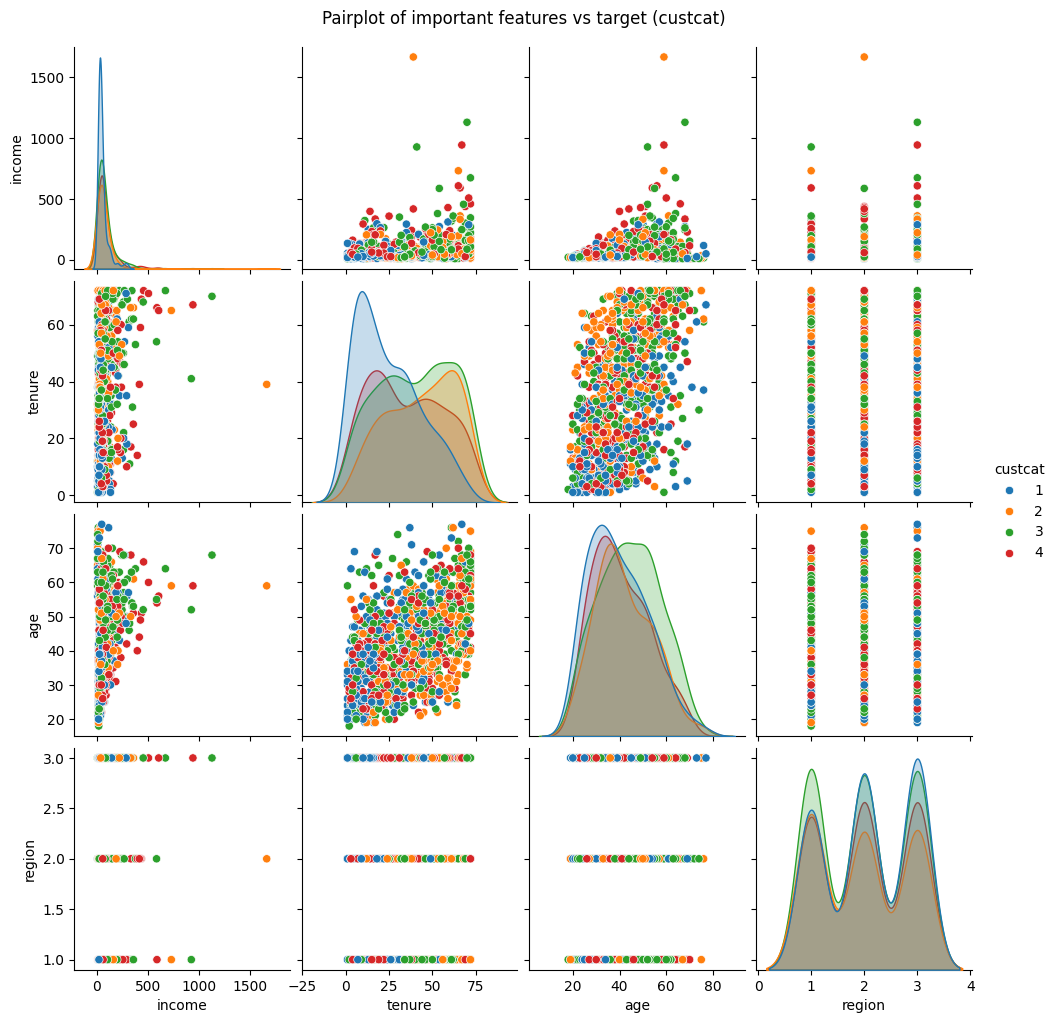

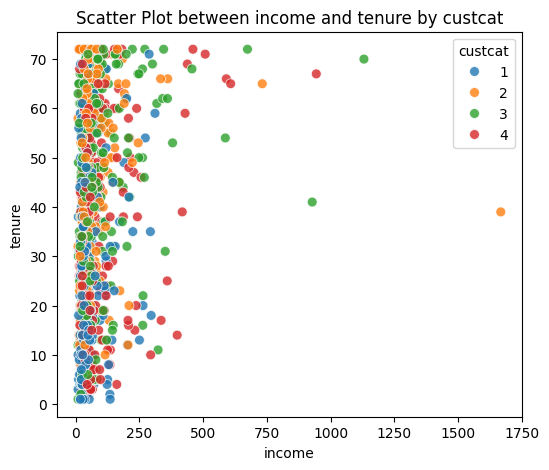

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette with distinct colors for 4 classes
custom_palette = {
    1: "#1f77b4",  # blue
    2: "#ff7f0e",  # orange
    3: "#2ca02c",  # green
    4: "#d62728"   # red (distinct from blue)
}

# Select important features (based on correlation analysis)
important_features = ['income', 'tenure', 'age', 'region']

# Ensure selected columns exist in the dataset
available_features = [col for col in important_features if col in df.columns]

# Check if we have enough features for plotting
if len(available_features) < 2:
    print("Not enough features available for plotting.")
else:
    # --- Pairplot ---
    sns.pairplot(df[available_features + ['custcat']], hue='custcat', palette=custom_palette, diag_kind='kde')
    plt.suptitle("Pairplot of important features vs target (custcat)", y=1.02, fontsize=12)
    plt.show()

    # --- Scatterplot (between first two important features) ---
    plt.figure(figsize=(6,5))
    sns.scatterplot(
        data=df,
        x=available_features[0],
        y=available_features[1],
        hue='custcat',
        palette=custom_palette,
        s=50,
        alpha=0.8
    )
    plt.title(f"Scatter Plot between {available_features[0]} and {available_features[1]} by custcat")
    plt.show()


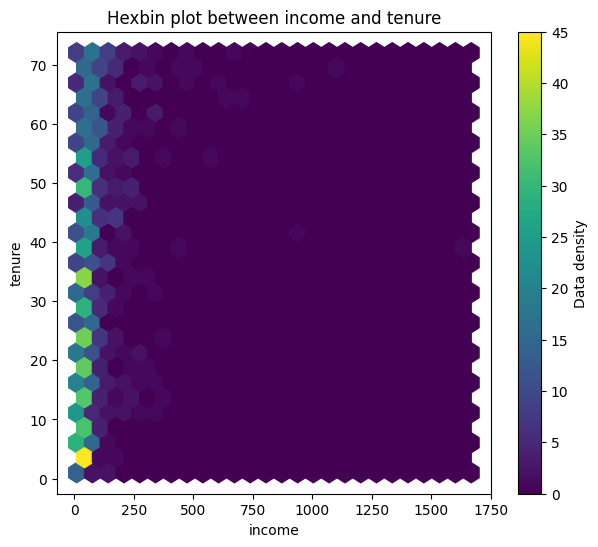

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select two most important numerical features
x_feature = 'income'
y_feature = 'tenure'

# Check that both columns exist
if x_feature in df.columns and y_feature in df.columns:
    plt.figure(figsize=(7,6))
    plt.hexbin(
        x=df[x_feature],
        y=df[y_feature],
        gridsize=25,
        cmap='viridis'
    )
    plt.colorbar(label='Data density')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"Hexbin plot between {x_feature} and {y_feature}")
    plt.show()

    # Optional: show distribution by custcat
    plt.figure(figsize=(7,6))
    sns.scatterplot(
        data=df, x=x_feature, y=y_feature,
        hue='custcat', palette='Set1', alpha=0.7
    )
    plt.title(f"Scatter Plot between {x_feature} and {y_feature} by custcat")
    plt.show()
else:
    print("One or both selected features are missing in the dataset.")


C:\Users\DR.ZAKERI\AppData\Local\Temp\ipykernel_496\1030638567.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




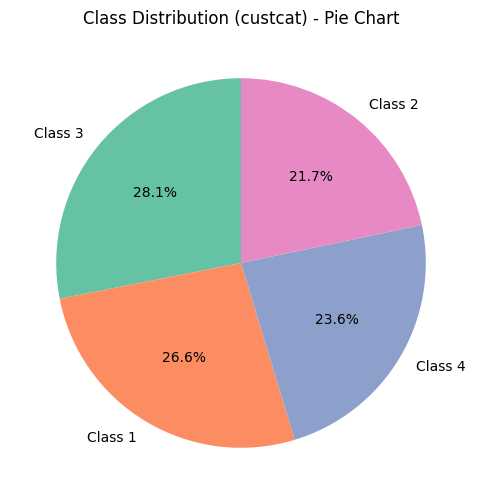

🔹 Class counts:


Count
custcat       
3          281
1          266
4          236
2          217


🔹 Percentage distribution:


%
custcat      
3        28.1
1        26.6
4        23.6
2        21.7

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Countplot ---
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='custcat', palette='Set2')
plt.title("Class Distribution (custcat) - Countplot")
plt.xlabel("Customer Category (custcat)")
plt.ylabel("Count")
plt.show()

# --- Pie Plot ---
plt.figure(figsize=(6,6))
counts = df['custcat'].value_counts()
labels = counts.index.astype(str)
plt.pie(
    counts,
    labels=[f"Class {l}" for l in labels],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2')
)
plt.title("Class Distribution (custcat) - Pie Chart")
plt.show()

# --- Print numerical details ---
print("🔹 Class counts:")
display(counts.to_frame("Count"))
print("\n🔹 Percentage distribution:")
display((counts / counts.sum() * 100).round(2).to_frame("%"))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Identify categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
print("Categorical features:", cat_cols)

# --- Option 1: One-Hot Encoding (recommended for non-ordinal features) ---
# Creates dummy variables (0/1 columns) for each category
df_encoded_onehot = pd.get_dummies(df, columns=cat_cols, drop_first=False)

print("\n One-Hot Encoding applied successfully.")
print("New shape:", df_encoded_onehot.shape)
display(df_encoded_onehot.head())

# --- Option 2: Label Encoding (use only if features are ordinal or few) ---
df_encoded_label = df.copy()
le = LabelEncoder()
for col in cat_cols:
    df_encoded_label[col] = le.fit_transform(df_encoded_label[col])
    
print("\n Label Encoding applied successfully.")
display(df_encoded_label.head())


Categorical features: []

✅ One-Hot Encoding applied successfully.
New shape: (1000, 12)


region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3


✅ Label Encoding applied successfully.


region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical columns (excluding target variable if needed)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'custcat' in num_cols:
    num_cols.remove('custcat')

print("Numerical features to be scaled:", num_cols)

# --- Option 1: Standardization (Z-score scaling) ---
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler_standard.fit_transform(df_standardized[num_cols])

print("\n Standardization applied successfully.")
display(df_standardized[num_cols].head())

# --- Option 2: Normalization (Min-Max scaling) ---
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = scaler_minmax.fit_transform(df_normalized[num_cols])

print("\n Normalization (Min-Max) applied successfully.")
display(df_normalized[num_cols].head())


Numerical features to be scaled: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']

 Standardization applied successfully.


region    tenure       age   marital   address    income        ed  \
0 -0.026968 -1.055125  0.184505  1.010051 -0.253034 -0.126506  1.087753   
1  1.198836 -1.148806 -0.691812  1.010051 -0.451415  0.546450  1.906227   
2  1.198836  1.521092  0.821826  1.010051  1.234819  0.359517 -1.367671   
3 -0.026968 -0.118319 -0.691812 -0.990050  0.044536 -0.416251 -0.549196   
4 -0.026968 -0.586722 -0.930808  1.010051 -0.253034 -0.444291 -1.367671   

     employ    retire    gender    reside  
0 -0.594123 -0.222076 -1.034598 -0.230650  
1 -0.594123 -0.222076 -1.034598  2.556662  
2  1.787528 -0.222076  0.966559 -0.230650  
3 -1.090300 -0.222076  0.966559 -0.927478  
4 -0.891829 -0.222076 -1.034598  1.163006


 Normalization (Min-Max) applied successfully.


region    tenure       age  marital   address    income    ed    employ  \
0     0.5  0.169014  0.440678      1.0  0.163636  0.033153  0.75  0.106383   
1     1.0  0.140845  0.254237      1.0  0.127273  0.076552  1.00  0.106383   
2     1.0  0.943662  0.576271      1.0  0.436364  0.064497  0.00  0.617021   
3     0.5  0.450704  0.254237      0.0  0.218182  0.014467  0.25  0.000000   
4     0.5  0.309859  0.203390      1.0  0.163636  0.012658  0.00  0.042553   

   retire  gender    reside  
0     0.0     0.0  0.142857  
1     0.0     0.0  0.714286  
2     0.0     1.0  0.142857  
3     0.0     1.0  0.000000  
4     0.0     0.0  0.428571

In [24]:
import pandas as pd

# --- Check for duplicate columns ---
duplicate_cols = df.columns[df.T.duplicated()].tolist()

if duplicate_cols:
    print("Duplicate columns found:", duplicate_cols)
    df = df.drop(columns=duplicate_cols)
    print("Duplicate columns removed successfully.")
else:
    print("No duplicate columns found.")

# --- Check for constant or near-constant (non-informative) columns ---
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]

if constant_cols:
    print("Non-informative columns detected:", constant_cols)
    df = df.drop(columns=constant_cols)
    print("Non-informative columns removed successfully.")
else:
    print("No non-informative (constant) columns found.")

# --- Optional: Check for highly correlated (redundant) numerical columns ---
corr_matrix = df.corr(numeric_only=True).abs()
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr = [
    col for col in upper_triangle.columns if any(upper_triangle[col] > 0.95)
]

if high_corr:
    print("Highly correlated (redundant) columns:", high_corr)
    # You can drop them if needed
    # df = df.drop(columns=high_corr)
else:
    print("No highly correlated columns (r > 0.95) found.")


No duplicate columns found.
No non-informative (constant) columns found.
No highly correlated columns (r > 0.95) found.


🔹 Lasso Regression - Selected Features:


ed         0.224733
tenure     0.180954
reside     0.098301
employ     0.061977
income     0.047316
marital   -0.007448
age       -0.015510
region    -0.031265
dtype: float64


🔹 RFE - Selected Top Features:
['region', 'tenure', 'age', 'marital', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']

✅ Features selected by both methods:
['marital', 'region', 'reside', 'employ', 'age', 'income', 'ed', 'tenure']


c:\Users\DR.ZAKERI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.

c:\Users\DR.ZAKERI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



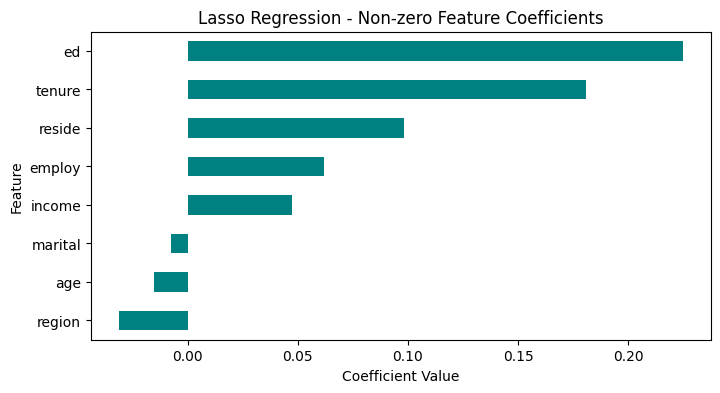

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Separate features and target ---
X = df.drop(columns=['custcat'])
y = df['custcat']

# --- Standardize numeric features (important for Lasso) ---
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# --- Split train/test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# =============================================================
#LASSO REGRESSION
# =============================================================
lasso = Lasso(alpha=0.01, random_state=42, max_iter=10000)
lasso.fit(X_train, y_train)

# Coefficients of Lasso model
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
lasso_selected = lasso_coef[lasso_coef != 0].sort_values(ascending=False)

print("🔹 Lasso Regression - Selected Features:")
display(lasso_selected)

# =============================================================
#RECURSIVE FEATURE ELIMINATION (RFE)
# =============================================================
# For classification tasks, Logistic Regression is often used as estimator
log_reg = LogisticRegression(max_iter=5000, solver='liblinear', multi_class='ovr')
rfe = RFE(estimator=log_reg, n_features_to_select=10)  # choose top 10 features (adjust if needed)
rfe.fit(X_train, y_train)

rfe_selected = pd.Series(rfe.support_, index=X.columns)
rfe_features = X.columns[rfe_selected].tolist()

print("\n🔹 RFE - Selected Top Features:")
print(rfe_features)

# =============================================================
#COMPARISON
# =============================================================
print("\n✅ Features selected by both methods:")
common_features = list(set(lasso_selected.index) & set(rfe_features))
print(common_features if common_features else "No exact overlap found.")

# Optional visualization of coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
lasso_coef[lasso_coef != 0].sort_values().plot(kind='barh', color='teal')
plt.title("Lasso Regression - Non-zero Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ---- 1) Resolve the final feature set ----
# Expecting variables from previous steps:
#   - lasso_selected : pd.Series of non-zero coef features (index = feature names)
#   - rfe_features   : list of features selected by RFE
# If they don't exist, fall back to top-10 numeric features by correlation with target.

def get_final_features(df):
    if 'lasso_selected' in globals() and 'rfe_features' in globals():
        lasso_feats = list(getattr(globals()['lasso_selected'], 'index', []))
        rfe_feats   = list(globals()['rfe_features'])
        # Prefer intersection; if empty, use union; if still empty, fallback later
        common = sorted(list(set(lasso_feats) & set(rfe_feats)))
        if len(common) > 0:
            return common
        union = sorted(list(set(lasso_feats) | set(rfe_feats)))
        if len(union) > 0:
            return union

    # Fallback: pick top-10 numeric features most correlated with custcat
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if 'custcat' in num_cols:
        num_cols.remove('custcat')
    corr = df[num_cols + ['custcat']].corr(numeric_only=True)['custcat'].abs().drop('custcat')
    return corr.sort_values(ascending=False).head(10).index.tolist()

final_features = get_final_features(df)
print("Selected features for Logistic Regression:", final_features)

# ---- 2) Prepare data ----
X = df[final_features].copy()
y = df['custcat'].copy()

# ---- 3) Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---- 4) Pipeline: scaling + Logistic Regression ----
logreg_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, multi_class="ovr", solver="liblinear"))
])

# ---- 5) Fit & quick accuracy ----
logreg_clf.fit(X_train, y_train)
train_acc = accuracy_score(y_train, logreg_clf.predict(X_train))
test_acc  = accuracy_score(y_test,  logreg_clf.predict(X_test))

print(f"Logistic Regression trained.")
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}")


Selected features for Logistic Regression: ['age', 'ed', 'employ', 'income', 'marital', 'region', 'reside', 'tenure']
Logistic Regression trained.
Train Accuracy: 0.435
Test  Accuracy: 0.375


c:\Users\DR.ZAKERI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on train and test sets
y_train_pred = logreg_clf.predict(X_train)
y_test_pred  = logreg_clf.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy  = accuracy_score(y_test, y_test_pred)

print(f"🔹 Train Accuracy: {train_accuracy:.4f}")
print(f"🔹 Test Accuracy : {test_accuracy:.4f}")

# Optional: classification report for detailed metrics
print("\n Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# Optional: confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


🔹 Train Accuracy: 0.4350
🔹 Test Accuracy : 0.3750

 Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.35      0.40      0.37        53
           2       0.32      0.16      0.21        44
           3       0.38      0.45      0.41        56
           4       0.42      0.47      0.44        47

    accuracy                           0.38       200
   macro avg       0.37      0.37      0.36       200
weighted avg       0.37      0.38      0.36       200



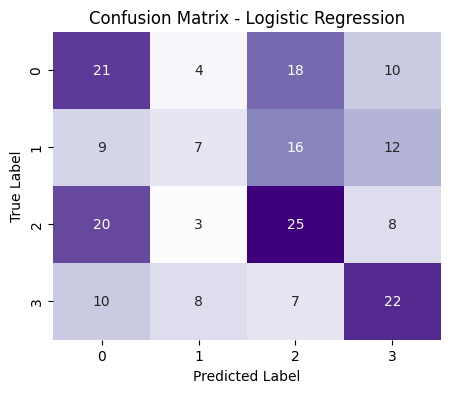

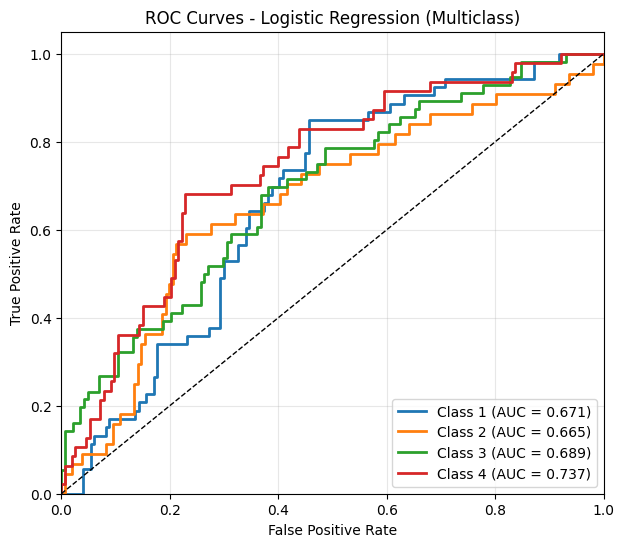

🔹 Macro-Averaged AUC: 0.6906
🔹 Weighted-Averaged AUC: 0.6903


In [29]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---- 1) Confusion Matrix ----
y_pred = logreg_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ---- 2) ROC Curve and AUC ----
# Binarize target labels for multiclass ROC (One-vs-Rest)
classes = sorted(y_test.unique())
y_test_bin = label_binarize(y_test, classes=classes)

# Get prediction probabilities
y_score = logreg_clf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ---- 3) Plot ROC Curves ----
plt.figure(figsize=(7,6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.3f})')
    
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Logistic Regression (Multiclass)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# ---- 4) Report Average AUC ----
macro_auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
weighted_auc = roc_auc_score(y_test_bin, y_score, average="weighted", multi_class="ovr")

print(f"🔹 Macro-Averaged AUC: {macro_auc:.4f}")
print(f"🔹 Weighted-Averaged AUC: {weighted_auc:.4f}")


In [30]:
# 1) Grab trained estimator and feature names
est = logreg_clf.named_steps["clf"]
feature_names = list(X_train.columns)
classes = est.classes_

# 2) Coefficient matrix: rows = classes (OvR), cols = features
coef_df = pd.DataFrame(est.coef_, index=[f"class_{c}" for c in classes], columns=feature_names)
# 3) Per-class top positive/negative features (by coefficient value)
top_k = 5  # change if you want more/less
print(f"Top +{top_k} and -{top_k} features per class (by coefficient):")
per_class_results = {}
for i, c in enumerate(classes):
    row = coef_df.iloc[i].sort_values(ascending=False)
    pos = row.head(top_k)
    neg = row.tail(top_k).sort_values()  # most negative
    per_class_results[c] = pd.DataFrame({
        "Top_Positive_Coef": pos,
        "Top_Negative_Coef": neg
    })
    print(f"\n=== Class {c} ===")
    display(per_class_results[c])

# 4) Overall most influential features (max |coef| across classes)
overall_importance = coef_df.abs().max(axis=0).sort_values(ascending=False)
print("\nOverall most influential features (by max |coef| across classes):")
display(overall_importance.to_frame("MaxAbsCoef").head(10))

# 5) Optional: Odds ratios (exp(coef)) for interpretability
odds_ratio_df = np.exp(coef_df)
print("\nOdds ratios (exp(coef)) per class (values >1 increase odds; <1 decrease odds):")
display(odds_ratio_df)


Top +5 and -5 features per class (by coefficient):

=== Class 1 ===


Top_Positive_Coef  Top_Negative_Coef
age               0.211561                NaN
ed                     NaN          -0.479357
employ           -0.027779          -0.027779
income                 NaN          -0.310804
marital           0.008109                NaN
region            0.189534                NaN
reside           -0.102771          -0.102771
tenure                 NaN          -0.938892


=== Class 2 ===


Top_Positive_Coef  Top_Negative_Coef
age                    NaN          -0.185875
ed                0.380223                NaN
employ                 NaN          -0.200136
income           -0.038893          -0.038893
marital           0.062562                NaN
region                 NaN          -0.102797
reside           -0.084987          -0.084987
tenure            0.736674                NaN


=== Class 3 ===


Top_Positive_Coef  Top_Negative_Coef
age              -0.061915          -0.061915
ed                     NaN          -0.605404
employ            0.176220                NaN
income            0.057872                NaN
marital           0.007873           0.007873
region                 NaN          -0.149718
reside                 NaN          -0.118239
tenure            0.190152                NaN


=== Class 4 ===


Top_Positive_Coef  Top_Negative_Coef
age                    NaN          -0.021335
ed                0.779730                NaN
employ            0.121106                NaN
income            0.058661           0.058661
marital                NaN          -0.094457
region            0.062673           0.062673
reside            0.328738                NaN
tenure                 NaN           0.023166


Overall most influential features (by max |coef| across classes):


MaxAbsCoef
tenure     0.938892
ed         0.779730
reside     0.328738
income     0.310804
age        0.211561
employ     0.200136
region     0.189534
marital    0.094457


Odds ratios (exp(coef)) per class (values >1 increase odds; <1 decrease odds):


age        ed    employ    income   marital    region    reside  \
class_1  1.235605  0.619181  0.972604  0.732857  1.008142  1.208686  0.902333   
class_2  0.830377  1.462611  0.818619  0.961854  1.064560  0.902310  0.918524   
class_3  0.939963  0.545854  1.192701  1.059579  1.007904  0.860951  0.888483   
class_4  0.978891  2.180884  1.128745  1.060416  0.909867  1.064679  1.389214   

           tenure  
class_1  0.391061  
class_2  2.088976  
class_3  1.209434  
class_4  1.023436

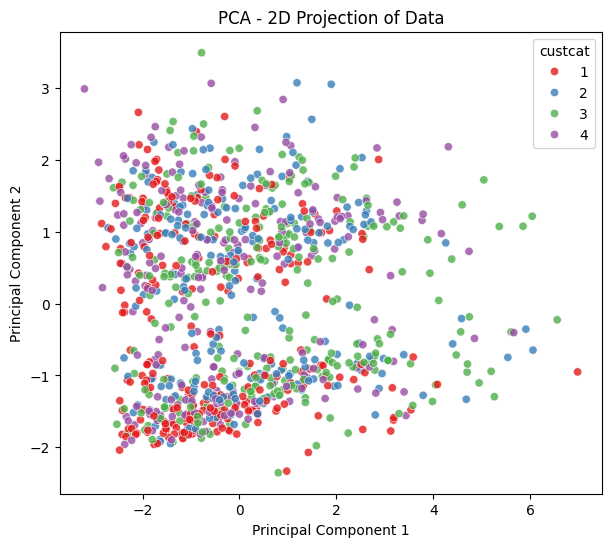

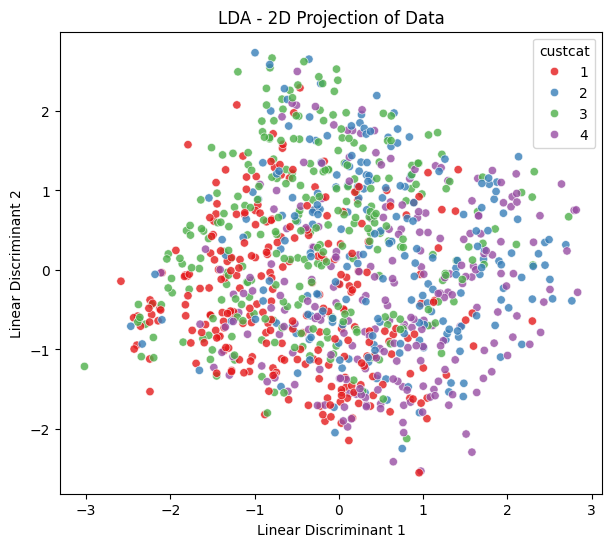

🔹 PCA explained variance ratio:
[0.28627756 0.15034329]
Total variance explained by 2 components: 43.66%


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# --- Separate features and target ---
X = df.drop(columns=['custcat'])
y = df['custcat']

# --- Scale data (important for PCA) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ================== 1) PCA ==================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Combine into a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['custcat'] = y.values

# --- PCA Scatter Plot ---
plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='custcat', palette='Set1', alpha=0.8)
plt.title('PCA - 2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='custcat')
plt.show()

# ================== 2) LDA ==================
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['custcat'] = y.values

# --- LDA Scatter Plot ---
plt.figure(figsize=(7,6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='custcat', palette='Set1', alpha=0.8)
plt.title('LDA - 2D Projection of Data')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='custcat')
plt.show()

# --- Explained variance for PCA ---
print("🔹 PCA explained variance ratio:")
print(pca.explained_variance_ratio_)
print(f"Total variance explained by 2 components: {sum(pca.explained_variance_ratio_)*100:.2f}%")


In [36]:
# ========= Fix labels to 0..C-1 and train =========
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

# X, y
X = df.drop(columns=['custcat']).values
y_raw = df['custcat'].values

# --- Map labels to 0..C-1 ---
classes_sorted = np.sort(np.unique(y_raw))          # e.g., [1,2,3,4]
cls2idx = {c:i for i, c in enumerate(classes_sorted)}
idx2cls = {i:c for c,i in cls2idx.items()}
y = np.vectorize(cls2idx.get)(y_raw)                # now 0..3

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)   # long!
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=32, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_t,  y_test_t ), batch_size=32, shuffle=False)

input_dim  = X_train.shape[1]
output_dim = len(classes_sorted)                      # 4

# model
class MLP_Embed2(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, 5)
        self.layer2 = nn.Linear(5, 2)   # embedding (2 neurons)
        self.layer3 = nn.Linear(2, output_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.layer1(x))
        emb = self.layer2(x)
        out = self.layer3(self.relu(emb))
        return out, emb

model = MLP_Embed2(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# train
epochs = 50
for epoch in range(epochs):
    model.train()
    total = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        logits, _ = model(xb)              # logits shape: [B, C]
        loss = criterion(logits, yb)       # yb shape: [B], values in 0..C-1
        loss.backward()
        optimizer.step()
        total += loss.item()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1:02d}/{epochs} - loss: {total/len(train_loader):.4f}")

# embeddings for whole dataset (optional)
model.eval()
with torch.no_grad():
    _, emb_all = model(torch.tensor(X_scaled, dtype=torch.float32))
emb_all = emb_all.numpy()

# make DataFrame with original class labels (1..4)
import seaborn as sns, matplotlib.pyplot as plt
mlp_df = pd.DataFrame(emb_all, columns=['Dim1','Dim2'])
mlp_df['custcat'] = np.vectorize(idx2cls.get)(y)     # back to 1..4 for plotting legend

plt.figure(figsize=(7,6))
sns.scatterplot(data=mlp_df, x='Dim1', y='Dim2', hue='custcat', palette='tab10', s=50, alpha=0.85)
plt.title("2D Embedding from MLP (pre-last layer = 2 neurons)")
plt.grid(True, alpha=0.3)
plt.show()


Epoch 10/50 - loss: 1.2652
Epoch 20/50 - loss: 1.1980
Epoch 30/50 - loss: 1.1854
Epoch 40/50 - loss: 1.1798
Epoch 50/50 - loss: 1.1747


✅ Extracted 2D embeddings from the penultimate layer.
       Dim1       Dim2  custcat
0 -1.649780  -5.748479        1
1  3.501218 -13.255212        4
2  1.851472   1.751951        3
3  0.468708   1.067782        1
4 -3.653239   2.748955        3


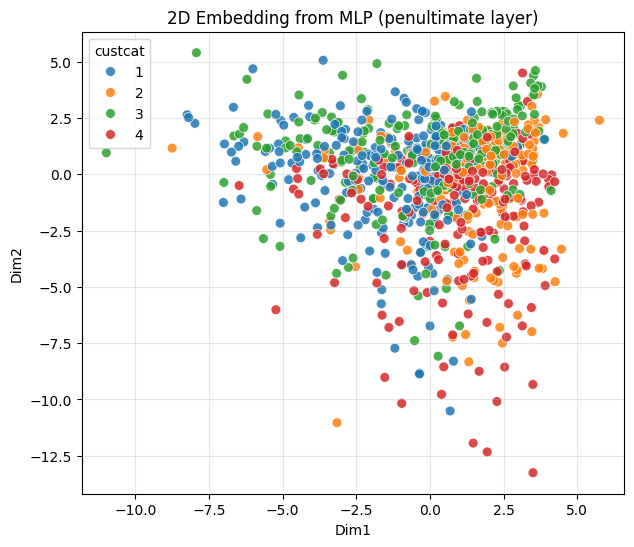

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

# ---- Prepare inputs (scale if needed) ----
X = df.drop(columns=['custcat']).values
if 'X_scaled' in globals():
    X_use = X_scaled
else:
    from sklearn.preprocessing import StandardScaler
    scaler = scaler if 'scaler' in globals() else StandardScaler().fit(X)
    X_use = scaler.transform(X)

X_t = torch.tensor(X_use, dtype=torch.float32)
loader = DataLoader(TensorDataset(X_t), batch_size=256, shuffle=False)

# ---- Helper: get embeddings from penultimate layer, robust to different forward() signatures ----
emb_list = []

# Case A: model.forward returns (logits, embedding) as in our defined MLP_Embed2
try:
    model.eval()
    with torch.no_grad():
        for (xb,) in loader:
            out = model(xb)
            if isinstance(out, tuple) and len(out) == 2:
                _, emb = out
            else:
                raise TypeError("forward() does not return embeddings; falling back to hook mode.")
            emb_list.append(emb.cpu().numpy())
    embeddings = np.vstack(emb_list)

except Exception:
    # Case B: forward() returns only logits; use a forward hook on the penultimate layer
    captured = []
    def hook_fn(_, __, output):
        captured.append(output.detach().cpu().numpy())

    # Adjust this to the actual name of your penultimate layer:
    penultimate_layer = model.layer2  # <-- change if your layer is named differently
    h = penultimate_layer.register_forward_hook(hook_fn)

    model.eval()
    with torch.no_grad():
        for (xb,) in loader:
            _ = model(xb)  # running forward fills `captured` via the hook

    h.remove()
    embeddings = np.vstack(captured)

# ---- Build a DataFrame for plotting or saving ----
mlp_df = pd.DataFrame(embeddings, columns=['Dim1', 'Dim2'])
mlp_df['custcat'] = df['custcat'].values  # keep original labels (1..4) for legend

# Preview
print("✅ Extracted 2D embeddings from the penultimate layer.")
print(mlp_df.head())

# ---- Optional: quick scatter plot ----
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(7,6))
sns.scatterplot(data=mlp_df, x='Dim1', y='Dim2', hue='custcat', palette='tab10', s=50, alpha=0.85)
plt.title("2D Embedding from MLP (penultimate layer)")
plt.grid(True, alpha=0.3)
plt.show()


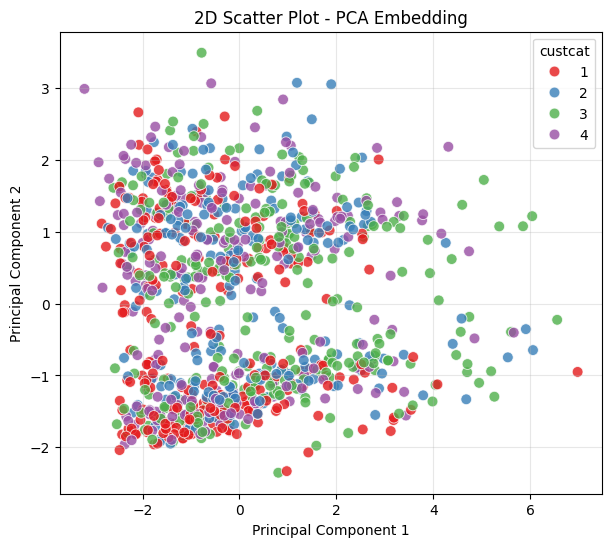

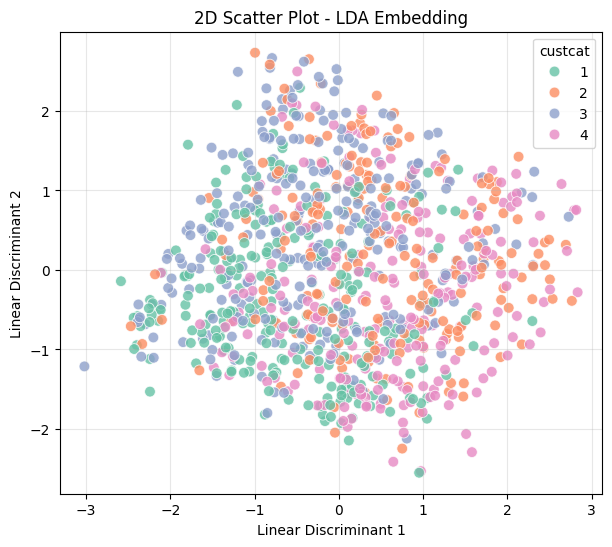

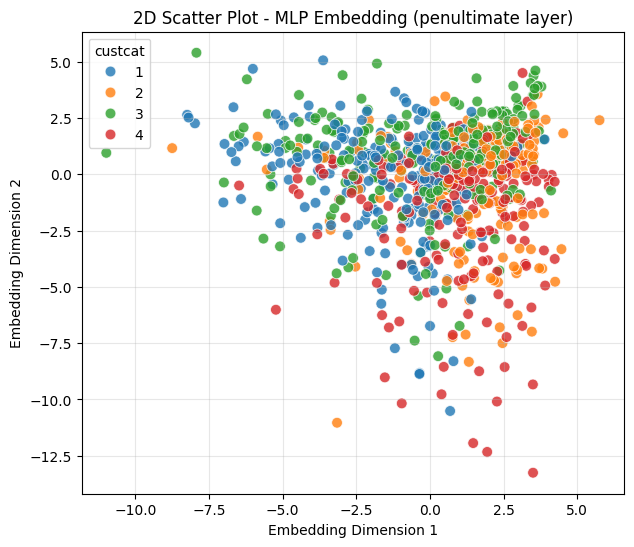

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# ================== 1) PCA ==================
# Assuming pca_df is available with Dim1 and Dim2
plt.figure(figsize=(7,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='custcat', palette='Set1', alpha=0.8, s=60)
plt.title('2D Scatter Plot - PCA Embedding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='custcat')
plt.grid(True, alpha=0.3)
plt.show()

# ================== 2) LDA ==================
# Assuming lda_df is available with LD1 and LD2
plt.figure(figsize=(7,6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='custcat', palette='Set2', alpha=0.8, s=60)
plt.title('2D Scatter Plot - LDA Embedding')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='custcat')
plt.grid(True, alpha=0.3)
plt.show()

# ================== 3) MLP ==================
# Assuming mlp_df is available with Dim1 and Dim2 (from the penultimate layer)
plt.figure(figsize=(7,6))
sns.scatterplot(data=mlp_df, x='Dim1', y='Dim2', hue='custcat', palette='tab10', alpha=0.8, s=60)
plt.title('2D Scatter Plot - MLP Embedding (penultimate layer)')
plt.xlabel('Embedding Dimension 1')
plt.ylabel('Embedding Dimension 2')
plt.legend(title='custcat')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
import numpy as np

# Assuming `pca_df`, `lda_df`, `mlp_df` are available

# ----------------- Function to compute Dunn Index -----------------
def dunn_index(embedding, labels):
    # Compute the Euclidean distance between all points
    dist_matrix = pairwise_distances(embedding)
    
    # Compute intra-cluster distances (min distance within each class)
    min_intra_distance = np.min(dist_matrix)
    
    # Compute inter-cluster distances (max distance between any two different classes)
    max_inter_distance = np.max(cdist(embedding, embedding))
    
    return min_intra_distance / max_inter_distance

# ----------------- Plotting and analysis -----------------
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# PCA plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='custcat', palette='Set1', ax=axes[0], alpha=0.8, s=60)
axes[0].set_title("PCA - 2D Embedding")
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# LDA plot
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='custcat', palette='Set2', ax=axes[1], alpha=0.8, s=60)
axes[1].set_title("LDA - 2D Embedding")
axes[1].set_xlabel('Linear Discriminant 1')
axes[1].set_ylabel('Linear Discriminant 2')

# MLP plot
sns.scatterplot(data=mlp_df, x='Dim1', y='Dim2', hue='custcat', palette='tab10', ax=axes[2], alpha=0.8, s=60)
axes[2].set_title("MLP - 2D Embedding (Penultimate Layer)")
axes[2].set_xlabel('Embedding Dim 1')
axes[2].set_ylabel('Embedding Dim 2')

# Display the plots
plt.tight_layout()
plt.show()

# ----------------- Compute Dunn Index for each method -----------------
pca_dunn = dunn_index(pca_df[['PC1', 'PC2']], pca_df['custcat'])
lda_dunn = dunn_index(lda_df[['LD1', 'LD2']], lda_df['custcat'])
mlp_dunn = dunn_index(mlp_df[['Dim1', 'Dim2']], mlp_df['custcat'])

# Print Dunn Index results for comparison
print(f"Dunn Index for PCA: {pca_dunn:.4f}")
print(f"Dunn Index for LDA: {lda_dunn:.4f}")
print(f"Dunn Index for MLP: {mlp_dunn:.4f}")
